# Exploratory Data Analysis 

This notebooks foucus on the EDA of the Jigsaw Agile Community Rules Classification Kaggle Competition

## Importing Bibs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
# from wordcloud import WordCloud

## 1.Loading Data

In [2]:
# TRAIN_DF_PATH = "train.csv"
# TEST_DF_PATH = "test.csv"

TRAIN_DF_PATH = "/kaggle/input/jigsaw-agile-community-rules/train.csv"
TEST_DF_PATH = "/kaggle/input/jigsaw-agile-community-rules/test.csv"

train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)
pd.set_option('display.max_colwidth', None)
print(f"Training data shape: {train_df.shape}")
print(f"Test data shape:     {test_df.shape}")
train_df.head(5)

Training data shape: (2029, 9)
Test data shape:     (10, 8)


,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here to know more!,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",Futurology,"If you could tell your younger self something different about sex, what would that be?\n\ni AM IN A CONTEST TO WIN FUNDING FOR MY SEX POSITIVE FILM: VOTE HERE:\n\nhttp://sheknows.offerpop.com/campaign/813112/entry/v144417",hunt for lady for jack off in neighbourhood http://url.inmusi.com/gakq,Watch Golden Globe Awards 2017 Live Online in HD Coverage without ADS (VIP STREAMS)\n=\n\nHD STREAM QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\n=\n\nHD BROADCASTING QUALITY >>> [WATCH LINK1](http://forum.submitexpress.com/viewtopic.php?f=9&t=215858)\n=\n\nMobile Compatibility: YES\n=\n\nNO ADS | NO ADS | ADS\n=\n,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/STREAM:\n\nhttp://music.theblacksmithed.com/download/birds/",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstreams247.com/astra-giurgiu-vs-fc-austria-wien/),"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",soccerstreams,[I wanna kiss you all over! Stunning!](http://www.oilflush.life/2017/01/26/6/),"LOLGA.COM is One of the First Professional Online Gold sites. By Now, As A Game Gold Seller, we've over more than 5 yrs Of Experience And Can Pass That On To Our Customers.","#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTube Search Beanie 864 Click Link BELOW To Hear Hit Single\n ""Ah Man"" \n Beanie 864 FEAT King Kota \n (King Kota Is Only 15!) Lit 🌡🔥👍💵💯Fr Fr \nhttps://youtu.be/tLqbV1Jmt5Y","[15 Amazing Hidden Features Of Google Search You Probably Don’t Know](http://www.madpeoples.com/2017/01/02 No one would argue the fact that Google is one of the most useful sihttp://www.madpeoples.com/2016/12/31/15-amazing-hidden-features-of-google-search-you-probably-dont-know/tes on the Internet. Unfortunately, most people only use about...?utm_source=reddit&utm_campaign=samreen&utm_medium=cpc)",0
2,2,Lol. Try appealing the ban and say you won't do it again.,No legal advice: Do not offer or request legal advice.,pcmasterrace,"Don't break up with him or call the cops. If you are willing to get beat up by him to stay with him, he is obviously a real winner and you know it, so you shouldn't leave him.",It'll be dismissed: https://en.wikipedia.org/wiki/New_York_Times_Co._v._Sullivan\n\nThe first amendment law here is SUPER settled.,Where is there a site that still works where you can jump the GPS. Is there a FAQ to do this with iPhone or Mac?,"Because this statement of his is true. It isn't freedom of the press, it's libel. And because of this, your post serves as a promotion for Trump. Reported.",1
3,3,she will come your home open her legs with and you http://sh.ors.it/PALI2,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",sex,Selling Tyrande codes for 3€ to paypal. PM. \nhttp://imgur.com/a/IMARW,tight pussy watch for your cock get her at this point http://macanasmagazine.com/yourls/hnof,NSFW(obviously) http://spankbang.com/iy3u/video/marica+hase+mirrors+edge,Good News ::Download WhatsApp 2.16.230 APK for Android – Latest Version,1
4,4,code free tyrande --->>> [Imgur](http://i.imgur.com/KlvssCl.png)\n\nfor you and your friend 2 codes for 4 dollars https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=UN4E27AG7BWKS\n\n2$... buy one directly from here: https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=VP3S5HQRE7T7E\n,"No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.",hearthstone,wow!! amazing reminds me of the old days.Well Do you desire a great spell caster and a herbal doctor to help you solve any problem you are going through? i am a proud testimony of what king 

## 2.Data quality

In [3]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              2029 non-null   int64 
 1   body                2029 non-null   object
 2   rule                2029 non-null   object
 3   subreddit           2029 non-null   object
 4   positive_example_1  2029 non-null   object
 5   positive_example_2  2029 non-null   object
 6   negative_example_1  2029 non-null   object
 7   negative_example_2  2029 non-null   object
 8   rule_violation      2029 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 142.8+ KB


None

Data types are Ok

In [4]:
missing = train_df.isnull().sum()
print("\nMissing values per column:")
print(missing)


Missing values per column:
row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64


No missing or null values :D

| Variable                                | Description                                                                                                                                                        |
| --------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| row_id                                  | A unique identifier for each row in the dataset.                                                                                                                   |
| body                                    | The main text content of the post or comment that needs to be evaluated.                                                                                           |
| rule                                    | The specific community (subreddit) rule that is being checked.                                                                                                     |
| subreddit                               | The name of the Reddit community from which the text and rule were sourced.                                                                                        |
| positive_example_1/2                 | Examples of text that violates the specified rule.                                                                               |
| negative_example_1/2                    | Examples of text that adhere the specified rule behavior.                                                                             |
| rule_violation (Target)                 | The target variable. It indicates whether the text in body violates the rule (True) or not (False). |

## 3.Data Balance and Unique Values

Number of unique rules:      2
Number of unique subreddits: 100


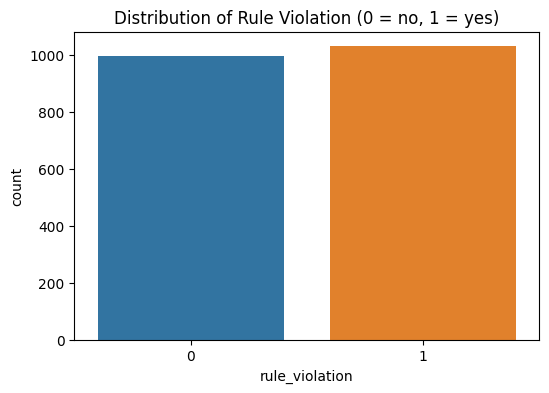

Overall violation rate: 0.508


In [5]:
n_rules      = train_df['rule'].nunique()
n_subreddits = train_df['subreddit'].nunique()
print(f"Number of unique rules:      {n_rules}")
print(f"Number of unique subreddits: {n_subreddits}")

plt.figure(figsize=(6,4))
sns.countplot(x='rule_violation', data=train_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Rule Violation (0 = no, 1 = yes)')
plt.show()

rate_overall = train_df['rule_violation'].mean()
print(f"Overall violation rate: {rate_overall:.3f}")

In [6]:
display(train_df["rule"].unique())

array(['No Advertising: Spam, referral links, unsolicited advertising, and promotional content are not allowed.',
       'No legal advice: Do not offer or request legal advice.'],
      dtype=object)

Data set is pretty balanced, just 2 rules to evaluate 

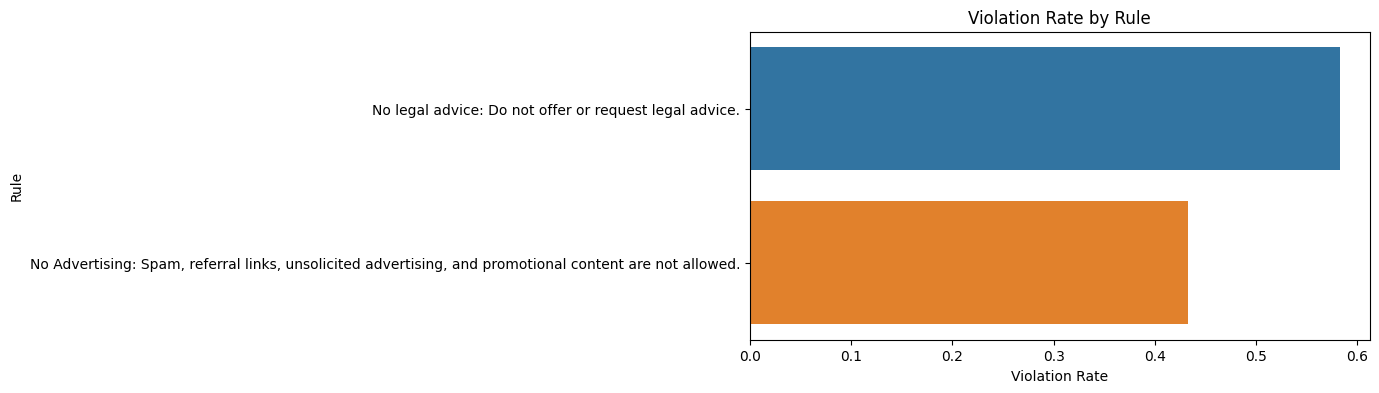

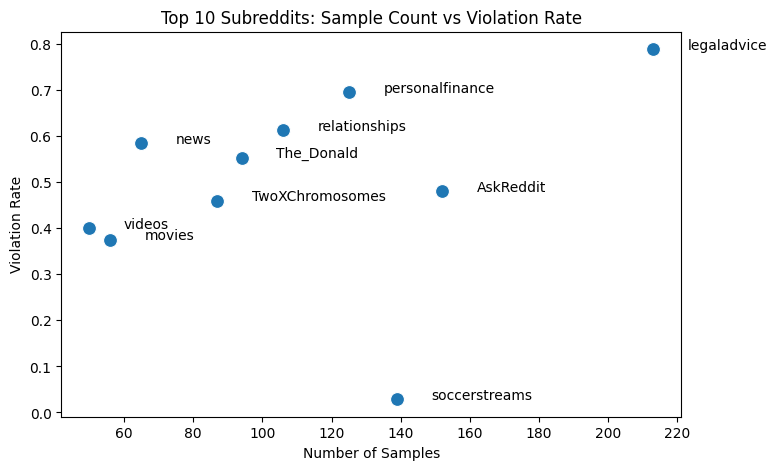

In [7]:
# By rule
rule_stats = train_df.groupby('rule')['rule_violation'] \
    .agg(['mean', 'count']) \
    .rename(columns={'mean':'violation_rate','count':'num_samples'}) \
    .sort_values('num_samples', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='violation_rate', y=rule_stats.index, data=rule_stats.reset_index(), palette=['#1f77b4', '#ff7f0e'])
plt.title('Violation Rate by Rule')
plt.xlabel('Violation Rate')
plt.ylabel('Rule')
plt.show()

# By subreddit (top 10)
sub_stats = train_df.groupby('subreddit')['rule_violation'] \
    .agg(['mean','count']) \
    .rename(columns={'mean':'violation_rate','count':'num_samples'}) \
    .sort_values('num_samples', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.scatterplot(x='num_samples', y='violation_rate', data=sub_stats.reset_index(), s=100)
for _, row in sub_stats.reset_index().iterrows():
    plt.text(row['num_samples']+10, row['violation_rate'], row['subreddit'])
plt.title('Top 10 Subreddits: Sample Count vs Violation Rate')
plt.xlabel('Number of Samples')
plt.ylabel('Violation Rate')
plt.show()

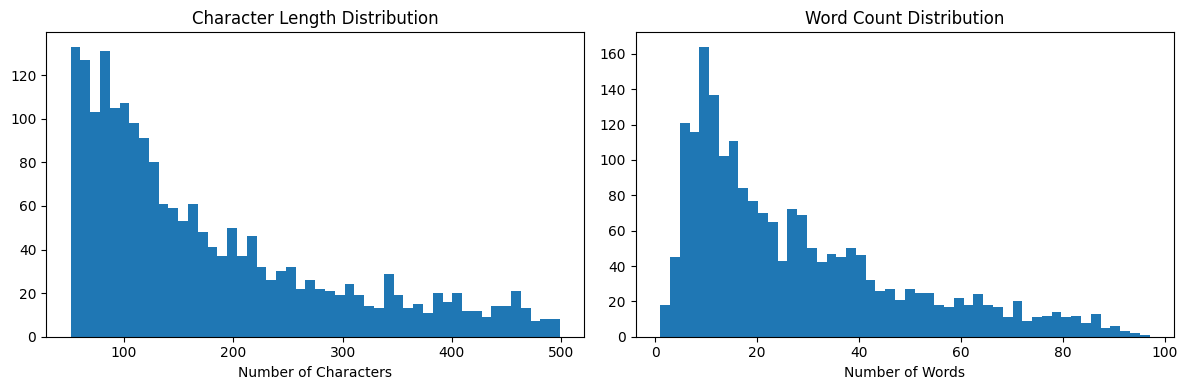

In [8]:
train_df['char_len'] = train_df['body'].str.len()
train_df['word_len'] = train_df['body'].str.split().map(len)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(train_df['char_len'], bins=50)
axes[0].set_title('Character Length Distribution')
axes[0].set_xlabel('Number of Characters')

axes[1].hist(train_df['word_len'], bins=50)
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Number of Words')

plt.tight_layout()
plt.show()

In [9]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizers
vectorizer_uni = CountVectorizer(ngram_range=(1,1), stop_words='english', min_df=5)
vectorizer_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english', min_df=5)

# Fit on all comments
grams_uni = vectorizer_uni.fit_transform(train_df['body'].fillna(""))
grams_bi  = vectorizer_bi.fit_transform(train_df['body'].fillna(""))

# Feature names
feat_uni = np.array(vectorizer_uni.get_feature_names_out())
feat_bi  = np.array(vectorizer_bi.get_feature_names_out())

# Function to get top n-grams for a class
def get_top_ngrams(matrix, labels, feat_names, cls, top_n=20):
    # Select rows for the class
    idx = np.where(labels == cls)[0]
    # Sum term frequencies
    class_sum = np.asarray(matrix[idx].sum(axis=0)).ravel()
    # Get top indices
    top_idx = class_sum.argsort()[::-1][:top_n]
    return feat_names[top_idx]

# Compute top n-grams for each class
labels = train_df['rule_violation'].values
top_uni_non = get_top_ngrams(grams_uni, labels, feat_uni, cls=0)
top_uni_vio = get_top_ngrams(grams_uni, labels, feat_uni, cls=1)
top_bi_non  = get_top_ngrams(grams_bi, labels, feat_bi, cls=0)
top_bi_vio  = get_top_ngrams(grams_bi, labels, feat_bi, cls=1)

print("Top 20 Unigrams (No Violation):", top_uni_non)
print("Top 20 Unigrams (Violation):",   top_uni_vio)
print("Top 20 Bigrams (No Violation):",  top_bi_non)
print("Top 20 Bigrams (Violation):",    top_bi_vio)

Top 20 Unigrams (No Violation): ['com' 'http' 'www' 'stream' 'https' 'hd' 'html' 'watch' 'live' 'mobile'
 'sd' 'english' 'vs' 'just' 'like' 'tv' 'yes' 'free' 'check' 'don']
Top 20 Unigrams (Violation): ['com' 'http' 'www' 'just' 'don' 'https' 'free' 'legal' 'like' 'sex'
 'want' 'law' 'know' 'people' 'illegal' 'police' 'need' 'money' 'll'
 'right']
Top 20 Bigrams (No Violation): ['http www' 'stream http' 'https www' 'youtube com' 'english stream'
 'www youtube' 'hd stream' 'com watch' 'sd stream' 'twitch tv'
 'html mobile' 'live stream' 'mobile yes' 'check instagram'
 'page dailyetymology' 'instagram page' 'mobile compatible' 'https youtu'
 'interesting check' 'oh interesting']
Top 20 Bigrams (Violation): ['http www' 'https www' 'com free' 'glitch fast' 'freekarma com'
 'free reddit' 'karma glitch' 'reddit karma' 'www freekarma'
 'fast patched' 'girls sex' 'girl sex' 'findsextoday com' 'free girls'
 'sex worldwide' 'mysexfind com' 'com girl' 'child support'
 'http mysexfind' 'don want']

## 4. Redução de Dimensionalidade e Análise de Violações

Vamos aplicar técnicas de redução de dimensionalidade para visualizar e entender melhor os padrões nos textos que violam as regras.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 4.1 Vectorização TF-IDF
print("=== Preparando dados para redução de dimensionalidade ===")

# Criando vectorizador TF-IDF
# TfidfVectorizer transforma textos em vetores numéricos baseados na frequência das palavras, ponderando por sua importância no corpus.
# Parâmetros:
# - max_features=5000: usa apenas as 5000 palavras/termos mais frequentes.
# - stop_words='english': remove palavras comuns do inglês (como "the", "and").
# - ngram_range=(1, 2): considera unigramas (palavras isoladas) e bigramas (pares de palavras).
# - min_df=2: ignora termos que aparecem em apenas 1 documento.
# - max_df=0.95: ignora termos que aparecem em mais de 95% dos documentos (muito comuns).
# O TF-IDF (Term Frequency-Inverse Document Frequency) calcula um peso para cada termo, sendo maior para termos frequentes em um documento, mas raros no corpus.

tfidf = TfidfVectorizer(
    max_features=5000,  # Top 5000 features
    stop_words='english',
    ngram_range=(1, 2),  # Unigrams e bigrams
    min_df=2,  # Aparecer em pelo menos 2 documentos
    max_df=0.95  # Não aparecer em mais de 95% dos documentos
)

# Transformando textos em vetores TF-IDF
X_tfidf = tfidf.fit_transform(train_df['body'].fillna(""))
feature_names = tfidf.get_feature_names_out()

print(f"Shape da matriz TF-IDF: {X_tfidf.shape}")
print(f"Número de features: {len(feature_names)}")

# Labels para os plots
y_labels = train_df['rule_violation'].values
colors = ['No Violation' if label == 0 else 'Violation' for label in y_labels]

=== Preparando dados para redução de dimensionalidade ===
Shape da matriz TF-IDF: (2029, 5000)
Número de features: 5000


=== Analisando Features Mais Discriminativas ===

=== TOP 20 FEATURES MAIS ASSOCIADAS A VIOLAÇÕES ===
legal: 0.0118
police: 0.0095
lawyer: 0.0090
sue: 0.0087
law: 0.0087
free: 0.0082
sex: 0.0078
legally: 0.0078
don: 0.0073
illegal: 0.0073
com free: 0.0071
girl: 0.0071
code: 0.0058
ll: 0.0058
property: 0.0055
state: 0.0053
girls sex: 0.0051
court: 0.0051
free girls: 0.0050
sex worldwide: 0.0050

=== TOP 20 FEATURES MAIS ASSOCIADAS A NÃO VIOLAÇÕES ===
stream: 0.0214
watch: 0.0171
www: 0.0161
http www: 0.0154
hd: 0.0154
https: 0.0140
html: 0.0137
sd: 0.0112
youtube: 0.0112
stream http: 0.0108
english: 0.0108
mobile: 0.0106
com: 0.0100
vs: 0.0100
youtube com: 0.0098
http: 0.0096
live: 0.0095
www youtube: 0.0090
https www: 0.0086
com watch: 0.0084


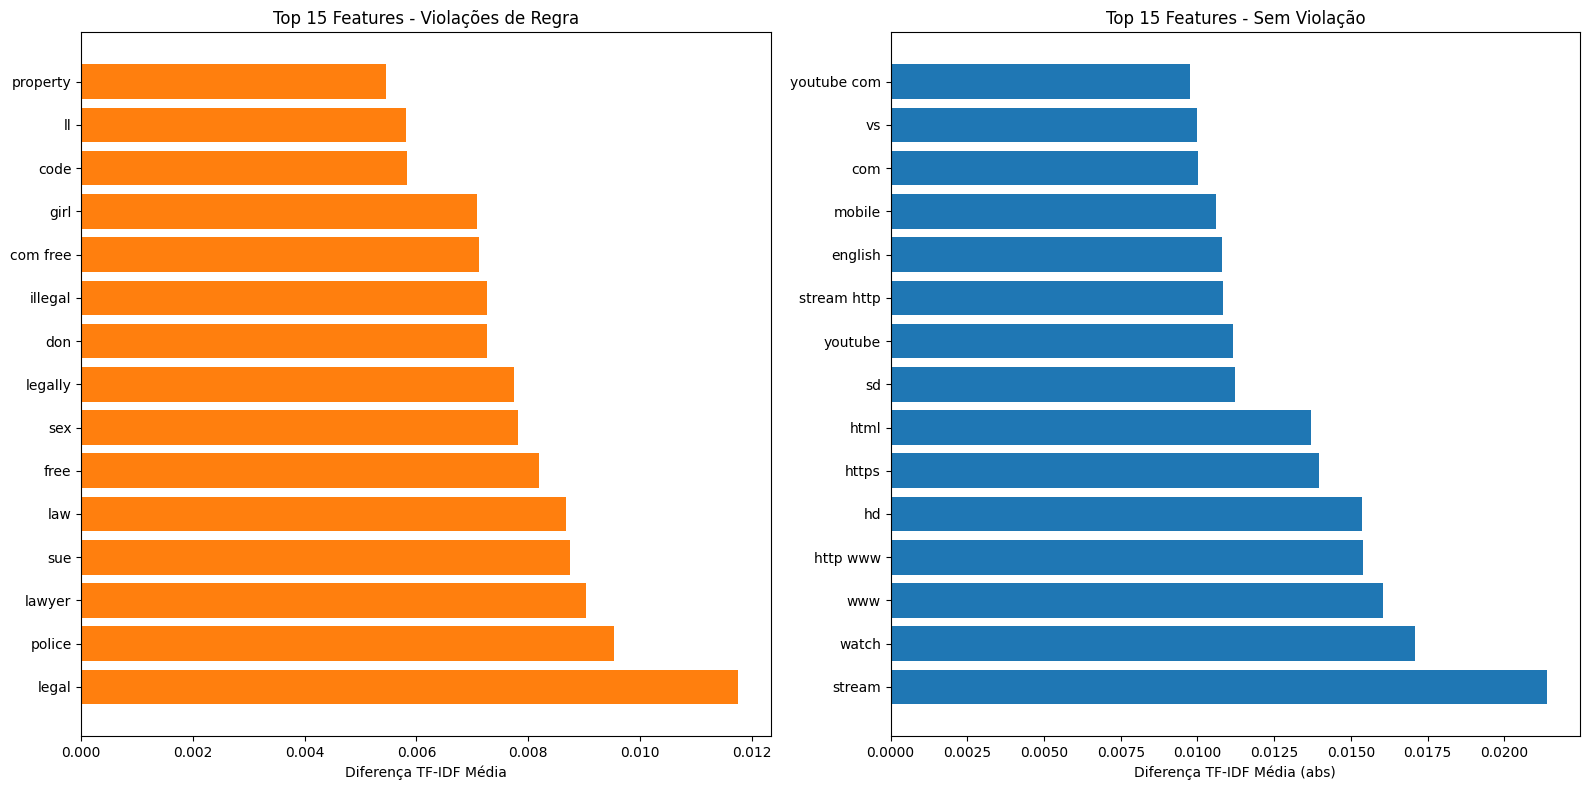

In [11]:
# 4.4 Análise das Features Mais Importantes
print("=== Analisando Features Mais Discriminativas ===")

# Calculando diferença média TF-IDF entre classes
X_tfidf_dense = X_tfidf.toarray()
mean_violation = X_tfidf_dense[y_labels == 1].mean(axis=0)
mean_no_violation = X_tfidf_dense[y_labels == 0].mean(axis=0)

# Diferença entre médias (positivo = mais comum em violações)
feature_diff = mean_violation - mean_no_violation

# Top features para violações
top_violation_indices = feature_diff.argsort()[-20:][::-1]
top_violation_features = [(feature_names[i], feature_diff[i]) for i in top_violation_indices]

# Top features para não violações
top_no_violation_indices = feature_diff.argsort()[:20]
top_no_violation_features = [(feature_names[i], abs(feature_diff[i])) for i in top_no_violation_indices]

print("\n=== TOP 20 FEATURES MAIS ASSOCIADAS A VIOLAÇÕES ===")
for feature, score in top_violation_features:
    print(f"{feature}: {score:.4f}")

print("\n=== TOP 20 FEATURES MAIS ASSOCIADAS A NÃO VIOLAÇÕES ===") 
for feature, score in top_no_violation_features:
    print(f"{feature}: {score:.4f}")

# Visualização das top features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Features de violação
violation_features = [f[0] for f in top_violation_features[:15]]
violation_scores = [f[1] for f in top_violation_features[:15]]

ax1.barh(range(len(violation_features)), violation_scores, color='#ff7f0e')
ax1.set_yticks(range(len(violation_features)))
ax1.set_yticklabels(violation_features)
ax1.set_title('Top 15 Features - Violações de Regra')
ax1.set_xlabel('Diferença TF-IDF Média')

# Features de não violação  
no_violation_features = [f[0] for f in top_no_violation_features[:15]]
no_violation_scores = [f[1] for f in top_no_violation_features[:15]]

ax2.barh(range(len(no_violation_features)), no_violation_scores, color='#1f77b4')
ax2.set_yticks(range(len(no_violation_features)))
ax2.set_yticklabels(no_violation_features)
ax2.set_title('Top 15 Features - Sem Violação')
ax2.set_xlabel('Diferença TF-IDF Média (abs)')

plt.tight_layout()
plt.show()

## Vamos utilizar busca nos embedings do Qwen3 0.6 para classificar nossos textos

In [12]:
from transformers import AutoTokenizer, AutoModel
import torch

class QwenEmbedder:
    def __init__(self, model_path, device=None):
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.tokenizer = AutoTokenizer.from_pretrained(model_path)
        self.model = AutoModel.from_pretrained(model_path, trust_remote_code=True).to(self.device)
        self.model.eval()

    def encode(self, texts, batch_size=32, normalize_embeddings=True):
        all_embs = []
        for i in range(0, len(texts), batch_size):
            batch = texts[i:i+batch_size]
            enc = self.tokenizer(batch, padding=True, truncation=True, return_tensors="pt", max_length=512).to(self.device)
            with torch.no_grad():
                out = self.model(**enc)
                embs = out.last_hidden_state.mean(dim=1)
                if normalize_embeddings:
                    embs = torch.nn.functional.normalize(embs, p=2, dim=1)
                all_embs.append(embs.cpu())
        return torch.cat(all_embs).numpy()


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm
from sentence_transformers import SentenceTransformer
import re, os


def clean_text(txt: str) -> str:
    if not isinstance(txt, str):
        return ""
    txt = txt.lower()
    txt = re.sub(r"http\S+|www\S+", " ", txt)
    txt = re.sub(r"\S*@\S*", " ", txt)
    txt = re.sub(r"\+?\d[\d -]{8,}\d", " ", txt)
    txt = re.sub(r"[^a-z\s]", " ", txt)
    txt = re.sub(r"\s+", " ", txt).strip()
    return txt


def load_train_split(data_path="./", test_size=0.2, seed=42):
    df = pd.read_csv(f"{data_path}/train.csv")

    df["text"] = df["body"].apply(clean_text)
    df["label"] = df["rule_violation"].map({1: 1, 0: -1})

    train_df, val_df = train_test_split(
        df, test_size=test_size, random_state=seed, stratify=df["rule_violation"]
    )

    print(f"Corpus (train): {len(train_df)} exemplos")
    print(f"Validação (test): {len(val_df)} exemplos")
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True)



def augment_with_examples(train_df, test_path="./"):
    """
    Cria um corpus semântico expandido a partir do train.csv e test.csv,
    combinando comentários reais e exemplos positivos/negativos de ambos.
    """
    test_df = pd.read_csv(f"{test_path}/test.csv")

    def extract_examples(df, col, label):
        if col not in df.columns:
            return pd.DataFrame()
        subset = df[[col, "rule", "subreddit"]].copy()
        subset = subset.rename(columns={col: "body"})
        subset["rule_violation"] = label
        subset["text"] = subset["body"].apply(clean_text)
        subset["label"] = 1 if label == 1 else -1
        return subset

    # 🔹 Extrai exemplos do train
    pos_train = pd.concat([
        extract_examples(train_df, "positive_example_1", 1),
        extract_examples(train_df, "positive_example_2", 1)
    ])
    neg_train = pd.concat([
        extract_examples(train_df, "negative_example_1", 0),
        extract_examples(train_df, "negative_example_2", 0)
    ])

    # 🔹 Extrai exemplos do test
    pos_test = pd.concat([
        extract_examples(test_df, "positive_example_1", 1),
        extract_examples(test_df, "positive_example_2", 1)
    ])
    neg_test = pd.concat([
        extract_examples(test_df, "negative_example_1", 0),
        extract_examples(test_df, "negative_example_2", 0)
    ])

    # 🔹 Junta todos
    augmented = pd.concat([
        train_df[["body", "rule", "subreddit", "rule_violation"]].assign(
            text=train_df["text"], label=train_df["rule_violation"].map({1: 1, 0: -1})
        ),
        pos_train, neg_train, pos_test, neg_test
    ])

    augmented = augmented.drop_duplicates(subset=["body"]).reset_index(drop=True)
    print(f"📈 Corpus expandido com {len(augmented)} exemplos únicos.")
    return augmented


def compute_rule_specific_scores(test_df, corpus_df, embedder, top_k=100):
    results = []

    for rule, test_subset in tqdm(test_df.groupby("rule"), desc="Processando regras"):
        corpus_subset = corpus_df[corpus_df["rule"] == rule]
        if len(corpus_subset) < 5:
            corpus_subset = corpus_df  # fallback

        corpus_texts = corpus_subset["text"].tolist()
        test_texts = test_subset["text"].tolist()

        emb_corpus = embedder.encode(corpus_texts, batch_size=64, normalize_embeddings=True)
        emb_test = embedder.encode(test_texts, batch_size=64, normalize_embeddings=True)

        similarities = cosine_similarity(emb_test, emb_corpus)
        sorted_idx = np.argsort(-similarities, axis=1)[:, :top_k]
        labels = corpus_subset["label"].to_numpy()

        scores = []
        for i in range(similarities.shape[0]):
            sims = similarities[i, sorted_idx[i]]
            lbls = labels[sorted_idx[i]]
            score = np.sum(sims * lbls) / (np.sum(sims) + 1e-8)
            scores.append(score)

        subset_result = test_subset.copy()
        subset_result["score_raw"] = scores
        results.append(subset_result)

    df_result = pd.concat(results, axis=0).reset_index(drop=True)
    # Normaliza scores para [0,1]
    df_result["score"] = (df_result["score_raw"] - df_result["score_raw"].min()) / (
        df_result["score_raw"].max() - df_result["score_raw"].min() + 1e-8
    )
    return df_result



def main(data_path="/kaggle/input/jigsaw-agile-community-rules"):
    # Carregar modelo Qwen Embeddings
    print("🔹 Carregando modelo de embeddings Qwen...")
    embedder = QwenEmbedder("/kaggle/input/qwen-3-embedding/transformers/0.6b/1")

    # Avaliação local
    print("🔹 Avaliação local (split do train)...")
    corpus_df, val_df = load_train_split(data_path)
    corpus_df = augment_with_examples(corpus_df, data_path)

    print("🔹 Calculando similaridades (validação)...")
    val_pred = compute_rule_specific_scores(val_df, corpus_df, embedder, top_k=100)

    y_true = val_pred["rule_violation"].to_numpy()
    y_score = val_pred["score"].to_numpy()
    auc = roc_auc_score(y_true, y_score)
    acc = accuracy_score(y_true, (y_score > 0.5).astype(int))
    print(f"✅ AUC (validação): {auc:.4f}")
    print(f"✅ Acurácia (validação): {acc:.3f}\n")

    # Submissão oficial
    print("🔹 Gerando submissão (usando test.csv completo)...")
    test_df = pd.read_csv(f"{data_path}/test.csv")
    test_df["text"] = test_df["body"].apply(clean_text)

    pred_df = compute_rule_specific_scores(test_df, corpus_df, embedder, top_k=100)

    output_path = "/kaggle/working/submission.csv"
    pred_df[["row_id", "score"]].rename(
        columns={"score": "rule_violation"}
    ).to_csv(output_path, index=False)

    print(f"📁 Arquivo de submissão salvo em: {output_path}")



if __name__ == "__main__":
    import torch
    main("/kaggle/input/jigsaw-agile-community-rules")


2025-10-13 11:44:27.460032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760355867.656773      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760355867.712997      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🔹 Carregando modelo de embeddings Qwen...


/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

🔹 Avaliação local (split do train)...
Corpus (train): 1623 exemplos
Validação (test): 406 exemplos
📈 Corpus expandido com 1691 exemplos únicos.
🔹 Calculando similaridades (validação)...


Processando regras:   0%|          | 0/2 [00:00<?, ?it/s]

✅ AUC (validação): 0.8467
✅ Acurácia (validação): 0.741

🔹 Gerando submissão (usando test.csv completo)...


Processando regras:   0%|          | 0/2 [00:00<?, ?it/s]

📁 Arquivo de submissão salvo em: /kaggle/working/submission.csv


In [14]:
pd.read_csv("submission.csv")


,row_id,rule_violation
0,2029,0.444574
1,2031,0.770029
2,2032,0.209667
3,2033,1.000000
4,2034,0.146766
5,2035,0.741245
6,2036,0.221764
7,2037,0.000000
8,2038,0.820212
9,2030,0.498026


In [15]:
!ls -lh /kaggle/working/submission.csv
!head /kaggle/working/submission.csv


-rw-r--r-- 1 root root 251 Oct 13 11:45 /kaggle/working/submission.csv


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


row_id,rule_violation
2029,0.44457397881324223
2031,0.7700286629657592
2032,0.20966742235654234
2033,0.9999999919211321
2034,0.14676565817144663
2035,0.7412453192720497
2036,0.22176361930779037
2037,0.0
2038,0.8202124283400046
